# Telco Churn Prediction Data Set

This data set contains information about a fictional telecommunications company that provides home phone and internet services to 7043 customers in California during the third quarter. It reveals which customers have churned (left) the services, who stayed, and who signed up for the services.

## Variables

1. **CustomerId**: Customer identification number.
2. **Gender**: Gender of the customer.
3. **SeniorCitizen**: Whether the customer is a senior citizen (1: Yes, 0: No).
4. **Partner**: Whether the customer has a partner (Yes, No).
5. **Dependents**: Whether the customer has dependents (Yes, No).
6. **tenure**: Number of months the customer has stayed with the company.
7. **PhoneService**: Whether the customer has phone service (Yes, No).
8. **MultipleLines**: Whether the customer has multiple phone lines (Yes, No, No phone service).
9. **InternetService**: Customer's internet service provider (DSL, Fiber optic, No).
10. **OnlineSecurity**: Whether the customer has online security (Yes, No, No internet service).
11. **OnlineBackup**: Whether the customer has online backup (Yes, No, No internet service).
12. **DeviceProtection**: Whether the customer has device protection (Yes, No, No internet service).
13. **TechSupport**: Whether the customer has tech support (Yes, No, No internet service).
14. **StreamingTV**: Whether the customer has streaming TV (Yes, No, No internet service).
15. **StreamingMovies**: Whether the customer has streaming movies (Yes, No, No internet service).
16. **Contract**: The contract term of the customer (Month-to-month, One year, Two year).
17. **PaperlessBilling**: Whether the customer has paperless billing (Yes, No).
18. **PaymentMethod**: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
19. **MonthlyCharges**: The amount billed to the customer monthly.
20. **TotalCharges**: The total amount charged to the customer.
21. **Churn**: Whether the customer has churned (Yes or No).

Analysis performed on this data set and models developed can be used for predicting customer churn.

---



# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import warnings
warnings.simplefilter(action="ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.5,No


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
df['TotalCharges'] = df["TotalCharges"].replace(" ", np.nan)

df["TotalCharges"] = df["TotalCharges"].astype(float)

df["TotalCharges"].dtypes

dtype('float64')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,1.000
tenure,7043.000,32.371,24.559,0.000,9.000,29.000,55.000,72.000
MonthlyCharges,7043.000,64.762,30.090,18.250,35.500,70.350,89.850,118.750
TotalCharges,7032.000,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800


In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Provides the names of categorical, numerical, and categorical but cardinal variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
            The dataframe from which variable names are to be extracted.
        cat_th: int, optional
            Class threshold value for numerical-looking categorical variables.
        car_th: int, optional
            Class threshold value for categorical but cardinal variables.

    Returns
    ------
        cat_cols: list
            List of categorical variable names.
        num_cols: list
            List of numerical variable names.
        cat_but_car: list
            List of categorical-looking cardinal variable names.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables.
        Numerical-looking categorical variables are included in cat_cols.
        The sum of the 3 lists returned is equal to the total number of variables: cat_cols + num_cols + cat_but_car = total number of variables.

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [12]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [13]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [14]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [15]:
cat_but_car

['customerID']

In [16]:
##################    Categorical Variable Analysis    #################

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("####################################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()
        
for col in cat_cols:
    cat_summary(df, col) 

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
####################################################
         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
####################################################
            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
####################################################
              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
####################################################
                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
####################################################
                 InternetService  Ratio
InternetService                        
Fiber optic         

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


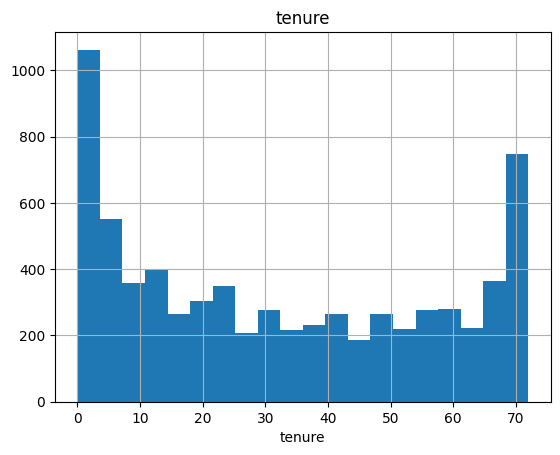

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64


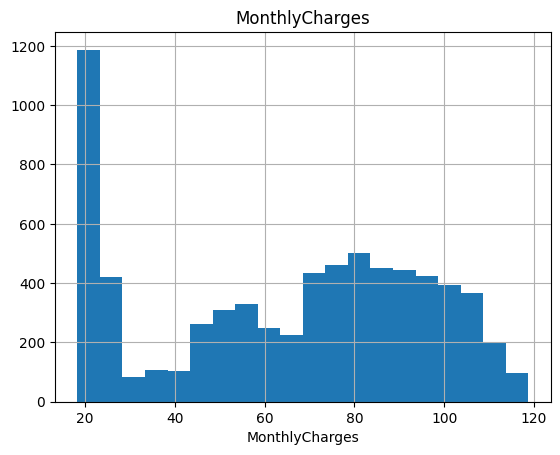

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


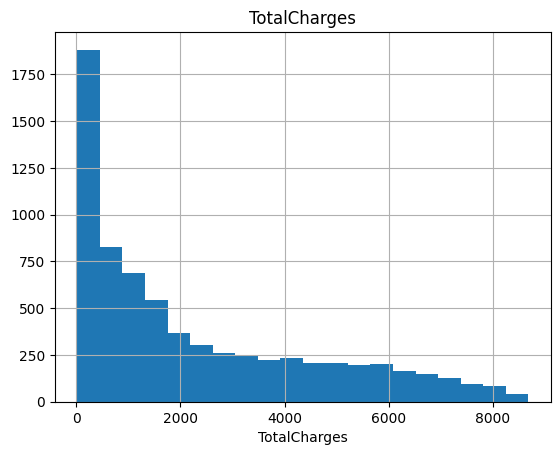

In [17]:
##################    Numerical Variable Analysis    #################

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(df, col, plot=True)

In [18]:
##################    Target Veriable Analysis    ##################

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
    print("##########################################")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
No     37.570
Yes    17.979


##########################################
       MonthlyCharges
Churn                
No             61.265
Yes            74.441


##########################################
       TotalCharges
Churn              
No         2555.344
Yes        1531.796


##########################################


In [19]:
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

In [20]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"CHURN_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

        CHURN_MEAN
gender            
Female       0.269
Male         0.262


         CHURN_MEAN
Partner            
No            0.330
Yes           0.197


            CHURN_MEAN
Dependents            
No               0.313
Yes              0.155


              CHURN_MEAN
PhoneService            
No                 0.249
Yes                0.267


                  CHURN_MEAN
MultipleLines               
No                     0.250
No phone service       0.249
Yes                    0.286


                 CHURN_MEAN
InternetService            
DSL                   0.190
Fiber optic           0.419
No                    0.074


                     CHURN_MEAN
OnlineSecurity                 
No                        0.418
No internet service       0.074
Yes                       0.146


                     CHURN_MEAN
OnlineBackup                   
No                        0.399
No internet service       0.074
Yes                       0.215


                     CHURN_MEAN

In [21]:
##################################
# Outlier Analysis
##################################

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
  

for col in num_cols:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [22]:
# Analyzing missing values (NaN)

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0] 
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False) 
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) 
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio']) 
    print(missing_df, end="\n")
    if na_name: 
        return na_columns
    
    
na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11  0.160


# Feature Engineering

In [23]:
# Filling in missing values 

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [24]:
##################################
# Feature Extraction
##################################

df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"New_Tenure_Cat"] = "Short"
df.loc[(df["tenure"]>12) & (df["tenure"]<=36),"New_Tenure_Cat"] = "Medium"
df.loc[(df["tenure"]>36) & (df["tenure"]<=72),"New_Tenure_Cat"] = "Long"


df['New_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)


df['New_FamilyAndDependents'] = (df['Partner'] == 'Yes') & (df['Dependents'] == 'Yes')


In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Tenure_Cat,New_TotalServices,New_FamilyAndDependents
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,Short,1,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,Medium,3,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,Short,3,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,Long,3,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,Short,1,False


In [26]:
##################
# Label Encoding
#################

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in binary_cols:
    df = label_encoder(df, col)

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,New_Tenure_Cat,New_TotalServices,New_FamilyAndDependents
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.850,29.850,0,Short,1,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.950,1889.500,0,Medium,3,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.850,108.150,1,Short,3,0
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.300,1840.750,0,Long,3,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.700,151.650,1,Short,1,0


In [28]:
###################
# One-Hot Encoding
##################

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)   
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2 and col not in ["Churn", "New_TotalServices"]]

In [29]:
ohe_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'New_Tenure_Cat']

In [30]:
df= one_hot_encoder(df, ohe_cols)

In [31]:
df.replace({False: 0, True: 1}, inplace=True) 

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,New_TotalServices,New_FamilyAndDependents,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,New_Tenure_Cat_Medium,New_Tenure_Cat_Short
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.850,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.500,0,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.150,1,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,3,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.650,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [33]:
##################################
# Feature Scaling
##################################

df_ = df.copy()

scaler = RobustScaler()
df_[num_cols] = scaler.fit_transform(df[num_cols])
df_.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,New_TotalServices,New_FamilyAndDependents,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,New_Tenure_Cat_Medium,New_Tenure_Cat_Short
0,7590-VHVEG,0,0,1,0,-0.609,0,1,-0.745,-0.404,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,5575-GNVDE,1,0,0,0,0.109,1,0,-0.247,0.145,0,3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
2,3668-QPYBK,1,0,0,0,-0.587,1,1,-0.304,-0.381,1,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,7795-CFOCW,1,0,0,0,0.348,0,0,-0.516,0.131,0,3,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,0,0,0,0,-0.587,1,1,0.006,-0.368,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Machine Learning Model Evaluations and Predictions

In [34]:
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve


### 1. Logistic Regression


In [35]:
y = df_["Churn"]
X = df_.drop(["Churn", 'customerID'], axis=1)

In [36]:
log_model = LogisticRegression(max_iter=1000, random_state=17).fit(X, y)

In [37]:
cv_results_log = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [38]:
y_preds = cross_val_predict(log_model, X, y, cv=5)

In [39]:
report_log = classification_report(y, y_preds)
print(report_log)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5174
           1       0.67      0.53      0.59      1869

    accuracy                           0.80      7043
   macro avg       0.75      0.72      0.73      7043
weighted avg       0.80      0.80      0.80      7043



In [41]:
cv_results_log['test_roc_auc'].mean()

0.8466152420023384

### 2. KNN

In [42]:
knn_model = KNeighborsClassifier().fit(X, y)

In [43]:
X_c_contiguous = np.ascontiguousarray(X)

In [44]:
cv_results_knn = cross_validate(knn_model,
                                X_c_contiguous, y,
                                cv=5,
                                scoring=["accuracy", "f1", "roc_auc"])

  File "C:\Anaconda\envs\machine_learning\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Anaconda\envs\machine_learning\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Anaconda\envs\machine_learning\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Anaconda\envs\machine_learning\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [45]:
y_preds_knn = cross_val_predict(knn_model, X_c_contiguous, y, cv=5)

In [46]:
report_knn = classification_report(y, y_preds_knn)
print(report_knn)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      5174
           1       0.58      0.53      0.56      1869

    accuracy                           0.77      7043
   macro avg       0.71      0.70      0.70      7043
weighted avg       0.77      0.77      0.77      7043



In [47]:
cv_results_knn['test_roc_auc'].mean()

0.7798890066127206

### 3. Random Forests, GBM, XGBoost, LightGBM, CatBoost

In [49]:
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

In [50]:
def evaluate_model(model, X, y):
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
    report = classification_report(y, cross_val_predict(model, X, y, cv=5))
    mean_accuracy = cv_results['test_accuracy'].mean()
    mean_f1 = cv_results['test_f1'].mean()
    mean_roc_auc = cv_results['test_roc_auc'].mean()
    return {
        "report": report,
        "accuracy_mean": mean_accuracy,
        "f1_mean": mean_f1,
        "roc_auc_mean": mean_roc_auc
    }

# Define the models
models = [
    ("CART", DecisionTreeClassifier(random_state=17)),
    ("Random Forest", RandomForestClassifier(random_state=17)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=17)),
    ('XGBoost', XGBClassifier(random_state=17)),
    ('LGBM', LGBMClassifier(random_state=17)),
    ('CatBoost', CatBoostClassifier(random_state=17, verbose=False))
]

In [52]:
# Create an empty DataFrame
results_df = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score", "ROC AUC"])

# Evaluate each model and add results to DataFrame
results = []

# Evaluate each model and add results to list
for model_name, model in models:
    model_results = evaluate_model(model, X, y)
    results.append({
        "Model": model_name,
        "Accuracy": model_results["accuracy_mean"],
        "F1 Score": model_results["f1_mean"],
        "ROC AUC": model_results["roc_auc_mean"]
    })

results_df = pd.DataFrame(results)

print(results_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

## Hyper-Parameter Optimization

In [55]:
#####################
# Logistic regression
#####################

log_param_grid = {
    'C': [0.01, 0.1, 1, 2], 
    'penalty': ['l1', 'l2'], 
    'solver': ['liblinear', 'saga'], 
    'l1_ratio': [0.2, 0.5, 0.8] 
}

y = df_["Churn"]
X = df_.drop(["Churn", 'customerID'], axis=1)

log_model = LogisticRegression(max_iter=1000, random_state=17).fit(X, y)

log_gs_best = GridSearchCV(log_model,
                           log_param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=1).fit(X, y)

log_final = log_model.set_params(**log_gs_best.best_params_).fit(X, y)

cv_results_log = cross_validate(log_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

logistic_results = {
    'Accuracy': cv_results_log['test_accuracy'].mean(),
    'F1 Score': cv_results_log['test_f1'].mean(),
    'ROC AUC': cv_results_log['test_roc_auc'].mean()
}


Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [57]:
logistic_results 

{'Accuracy': 0.8049147324020904,
 'F1 Score': 0.5901674639423964,
 'ROC AUC': 0.846668776752459}

In [61]:
####################
# Gradient Boosting
####################

gbm_params = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 8, 10],  
    "n_estimators": [100, 200], 
    "subsample": [1, 0.5, 0.7]  
}    
    
y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)
    
gbm_model = GradientBoostingClassifier(random_state=17)

gbm_best_grid = GridSearchCV(gbm_model,
                             gbm_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=True).fit(X, y)

gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_, random_state=17).fit(X, y)

cv_results_gbm = cross_validate(gbm_final,
                                X, y,
                                cv=5,
                                scoring=["accuracy", "f1", "roc_auc"])
    
    
gbm_results = {
    'Accuracy': cv_results_gbm['test_accuracy'].mean(),
    'F1 Score': cv_results_gbm['test_f1'].mean(),
    'ROC AUC': cv_results_gbm['test_roc_auc'].mean()
}

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [63]:
gbm_best_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [64]:
gbm_results

{'Accuracy': 0.806049281405252,
 'F1 Score': 0.5917157392540824,
 'ROC AUC': 0.8461085056606311}

In [67]:
###########
# LightGBM
###########

lgbm_params = {
    "learning_rate": [0.01, 0.02],
    "n_estimators": [450, 480, 500],  
    "colsample_bytree":[0.7, 0,72, 0,75] 
}

y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

lgbm_model = LGBMClassifier(random_state=17)

lgbm_best_grid = GridSearchCV(lgbm_model,
                             lgbm_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

cv_results_lgbm = cross_validate(lgbm_final,
                                X, y,
                                cv=5,
                                scoring=["accuracy", "f1", "roc_auc"])

lgbm_results = {
    'Accuracy': cv_results_lgbm['test_accuracy'].mean(),
    'F1 Score': cv_results_lgbm['test_f1'].mean(),
    'ROC AUC': cv_results_lgbm['test_roc_auc'].mean()
}

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 7043, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265370 -> initscore=-1.018243
[LightGBM] [Info] Start training from score -1.018243
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5174
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000926 seconds.
You can set `force_row_wise=true` to remove t

In [68]:
lgbm_best_grid.best_params_

{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 480}

In [69]:
lgbm_results 

{'Accuracy': 0.8022160703916381,
 'F1 Score': 0.5824513034897227,
 'ROC AUC': 0.8431914838035286}

In [71]:
###########
# CatBoost
###########

y = df["Churn"]
X = df.drop(["Churn", "customerID"], axis=1)

catboost_params = {
    "iterations": [200, 500],  # n-estimators
    "learning_rate": [0.01, 0.1],
    "depth": [3, 6]
}

catboost_model = CatBoostClassifier(random_state=17)

catboost_best_grid = GridSearchCV(catboost_model,
                                   catboost_params,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=False).fit(X, y)

catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_, random_state=17).fit(X, y)

cv_results_catboost = cross_validate(catboost_final,
                                     X, y,
                                     cv=5,
                                     scoring=["accuracy", "f1", "roc_auc"])

catboost_results = {
    'Accuracy': cv_results_catboost['test_accuracy'].mean(),
    'F1 Score': cv_results_catboost['test_f1'].mean(),
    'ROC AUC': cv_results_catboost['test_roc_auc'].mean()
}

0:	learn: 0.6865909	total: 8.54ms	remaining: 4.26s
1:	learn: 0.6800962	total: 17.4ms	remaining: 4.33s
2:	learn: 0.6742623	total: 24.1ms	remaining: 3.99s
3:	learn: 0.6684495	total: 32.4ms	remaining: 4.02s
4:	learn: 0.6629871	total: 41.6ms	remaining: 4.12s
5:	learn: 0.6562465	total: 50.2ms	remaining: 4.14s
6:	learn: 0.6508862	total: 59.1ms	remaining: 4.16s
7:	learn: 0.6448067	total: 68ms	remaining: 4.18s
8:	learn: 0.6389634	total: 76.8ms	remaining: 4.19s
9:	learn: 0.6339504	total: 85.6ms	remaining: 4.19s
10:	learn: 0.6289276	total: 94.4ms	remaining: 4.19s
11:	learn: 0.6233901	total: 103ms	remaining: 4.2s
12:	learn: 0.6186441	total: 112ms	remaining: 4.2s
13:	learn: 0.6136746	total: 121ms	remaining: 4.19s
14:	learn: 0.6090153	total: 130ms	remaining: 4.2s
15:	learn: 0.6045514	total: 139ms	remaining: 4.19s
16:	learn: 0.6000287	total: 147ms	remaining: 4.18s
17:	learn: 0.5953827	total: 156ms	remaining: 4.17s
18:	learn: 0.5913683	total: 165ms	remaining: 4.17s
19:	learn: 0.5878788	total: 173ms	r

167:	learn: 0.4170369	total: 1.66s	remaining: 3.29s
168:	learn: 0.4167744	total: 1.68s	remaining: 3.28s
169:	learn: 0.4164699	total: 1.69s	remaining: 3.28s
170:	learn: 0.4161858	total: 1.7s	remaining: 3.27s
171:	learn: 0.4159856	total: 1.71s	remaining: 3.26s
172:	learn: 0.4157581	total: 1.72s	remaining: 3.25s
173:	learn: 0.4154742	total: 1.73s	remaining: 3.24s
174:	learn: 0.4152818	total: 1.74s	remaining: 3.22s
175:	learn: 0.4150785	total: 1.75s	remaining: 3.21s
176:	learn: 0.4148397	total: 1.75s	remaining: 3.2s
177:	learn: 0.4145930	total: 1.76s	remaining: 3.19s
178:	learn: 0.4144099	total: 1.77s	remaining: 3.18s
179:	learn: 0.4141774	total: 1.78s	remaining: 3.17s
180:	learn: 0.4139755	total: 1.79s	remaining: 3.15s
181:	learn: 0.4137585	total: 1.8s	remaining: 3.14s
182:	learn: 0.4135632	total: 1.81s	remaining: 3.13s
183:	learn: 0.4133906	total: 1.82s	remaining: 3.12s
184:	learn: 0.4131559	total: 1.82s	remaining: 3.11s
185:	learn: 0.4130136	total: 1.83s	remaining: 3.1s
186:	learn: 0.41

337:	learn: 0.3946742	total: 3.49s	remaining: 1.67s
338:	learn: 0.3946414	total: 3.5s	remaining: 1.66s
339:	learn: 0.3945729	total: 3.52s	remaining: 1.66s
340:	learn: 0.3944948	total: 3.53s	remaining: 1.65s
341:	learn: 0.3944313	total: 3.54s	remaining: 1.64s
342:	learn: 0.3943705	total: 3.56s	remaining: 1.63s
343:	learn: 0.3942813	total: 3.57s	remaining: 1.62s
344:	learn: 0.3942074	total: 3.58s	remaining: 1.61s
345:	learn: 0.3941257	total: 3.59s	remaining: 1.6s
346:	learn: 0.3940730	total: 3.6s	remaining: 1.58s
347:	learn: 0.3939905	total: 3.6s	remaining: 1.57s
348:	learn: 0.3939059	total: 3.61s	remaining: 1.56s
349:	learn: 0.3938324	total: 3.62s	remaining: 1.55s
350:	learn: 0.3937827	total: 3.63s	remaining: 1.54s
351:	learn: 0.3937506	total: 3.64s	remaining: 1.53s
352:	learn: 0.3936920	total: 3.65s	remaining: 1.52s
353:	learn: 0.3936303	total: 3.66s	remaining: 1.51s
354:	learn: 0.3935536	total: 3.67s	remaining: 1.5s
355:	learn: 0.3934988	total: 3.67s	remaining: 1.49s
356:	learn: 0.393

0:	learn: 0.6865909	total: 8.61ms	remaining: 4.29s
1:	learn: 0.6800962	total: 17.2ms	remaining: 4.28s
2:	learn: 0.6742623	total: 23.9ms	remaining: 3.96s
3:	learn: 0.6684495	total: 32.5ms	remaining: 4.02s
4:	learn: 0.6629871	total: 42.7ms	remaining: 4.22s
5:	learn: 0.6562465	total: 53.6ms	remaining: 4.41s
6:	learn: 0.6508862	total: 66.3ms	remaining: 4.67s
7:	learn: 0.6448067	total: 77.4ms	remaining: 4.76s
8:	learn: 0.6389634	total: 87.5ms	remaining: 4.77s
9:	learn: 0.6339504	total: 99.9ms	remaining: 4.89s
10:	learn: 0.6289276	total: 112ms	remaining: 4.97s
11:	learn: 0.6233901	total: 121ms	remaining: 4.92s
12:	learn: 0.6186441	total: 133ms	remaining: 4.97s
13:	learn: 0.6136746	total: 145ms	remaining: 5.03s
14:	learn: 0.6090153	total: 155ms	remaining: 5.02s
15:	learn: 0.6045514	total: 166ms	remaining: 5.03s
16:	learn: 0.6000287	total: 179ms	remaining: 5.08s
17:	learn: 0.5953827	total: 189ms	remaining: 5.06s
18:	learn: 0.5913683	total: 199ms	remaining: 5.03s
19:	learn: 0.5878788	total: 215

177:	learn: 0.4145930	total: 1.8s	remaining: 3.26s
178:	learn: 0.4144099	total: 1.81s	remaining: 3.25s
179:	learn: 0.4141774	total: 1.82s	remaining: 3.25s
180:	learn: 0.4139755	total: 1.83s	remaining: 3.23s
181:	learn: 0.4137585	total: 1.84s	remaining: 3.22s
182:	learn: 0.4135632	total: 1.85s	remaining: 3.21s
183:	learn: 0.4133906	total: 1.86s	remaining: 3.2s
184:	learn: 0.4131559	total: 1.87s	remaining: 3.18s
185:	learn: 0.4130136	total: 1.88s	remaining: 3.17s
186:	learn: 0.4127965	total: 1.89s	remaining: 3.16s
187:	learn: 0.4126311	total: 1.9s	remaining: 3.15s
188:	learn: 0.4123394	total: 1.91s	remaining: 3.14s
189:	learn: 0.4120899	total: 1.91s	remaining: 3.12s
190:	learn: 0.4119042	total: 1.92s	remaining: 3.11s
191:	learn: 0.4116276	total: 1.93s	remaining: 3.1s
192:	learn: 0.4114589	total: 1.94s	remaining: 3.09s
193:	learn: 0.4113171	total: 1.95s	remaining: 3.08s
194:	learn: 0.4111757	total: 1.96s	remaining: 3.07s
195:	learn: 0.4109822	total: 1.97s	remaining: 3.05s
196:	learn: 0.41

349:	learn: 0.3938324	total: 3.42s	remaining: 1.47s
350:	learn: 0.3937827	total: 3.43s	remaining: 1.46s
351:	learn: 0.3937506	total: 3.44s	remaining: 1.45s
352:	learn: 0.3936920	total: 3.45s	remaining: 1.44s
353:	learn: 0.3936303	total: 3.46s	remaining: 1.43s
354:	learn: 0.3935536	total: 3.47s	remaining: 1.42s
355:	learn: 0.3934988	total: 3.48s	remaining: 1.41s
356:	learn: 0.3934115	total: 3.49s	remaining: 1.4s
357:	learn: 0.3933578	total: 3.5s	remaining: 1.39s
358:	learn: 0.3932594	total: 3.51s	remaining: 1.38s
359:	learn: 0.3932026	total: 3.52s	remaining: 1.37s
360:	learn: 0.3931054	total: 3.52s	remaining: 1.36s
361:	learn: 0.3930298	total: 3.53s	remaining: 1.35s
362:	learn: 0.3929707	total: 3.54s	remaining: 1.34s
363:	learn: 0.3929081	total: 3.55s	remaining: 1.33s
364:	learn: 0.3928499	total: 3.56s	remaining: 1.32s
365:	learn: 0.3927970	total: 3.57s	remaining: 1.31s
366:	learn: 0.3927359	total: 3.58s	remaining: 1.3s
367:	learn: 0.3927081	total: 3.59s	remaining: 1.29s
368:	learn: 0.3

24:	learn: 0.5720585	total: 215ms	remaining: 4.08s
25:	learn: 0.5686931	total: 226ms	remaining: 4.11s
26:	learn: 0.5653019	total: 237ms	remaining: 4.15s
27:	learn: 0.5619137	total: 246ms	remaining: 4.14s
28:	learn: 0.5584065	total: 254ms	remaining: 4.13s
29:	learn: 0.5547876	total: 263ms	remaining: 4.13s
30:	learn: 0.5515863	total: 272ms	remaining: 4.11s
31:	learn: 0.5485850	total: 280ms	remaining: 4.09s
32:	learn: 0.5458939	total: 289ms	remaining: 4.08s
33:	learn: 0.5432031	total: 297ms	remaining: 4.07s
34:	learn: 0.5402718	total: 305ms	remaining: 4.06s
35:	learn: 0.5377046	total: 314ms	remaining: 4.04s
36:	learn: 0.5348406	total: 322ms	remaining: 4.03s
37:	learn: 0.5329289	total: 327ms	remaining: 3.98s
38:	learn: 0.5305276	total: 335ms	remaining: 3.96s
39:	learn: 0.5277542	total: 344ms	remaining: 3.95s
40:	learn: 0.5254311	total: 352ms	remaining: 3.94s
41:	learn: 0.5231978	total: 360ms	remaining: 3.93s
42:	learn: 0.5209017	total: 369ms	remaining: 3.92s
43:	learn: 0.5184368	total: 377

186:	learn: 0.4143920	total: 1.8s	remaining: 3.02s
187:	learn: 0.4142255	total: 1.81s	remaining: 3.01s
188:	learn: 0.4139423	total: 1.82s	remaining: 3s
189:	learn: 0.4137651	total: 1.84s	remaining: 3s
190:	learn: 0.4136015	total: 1.85s	remaining: 2.99s
191:	learn: 0.4133629	total: 1.86s	remaining: 2.98s
192:	learn: 0.4131723	total: 1.87s	remaining: 2.98s
193:	learn: 0.4129865	total: 1.88s	remaining: 2.97s
194:	learn: 0.4128115	total: 1.89s	remaining: 2.96s
195:	learn: 0.4126353	total: 1.91s	remaining: 2.95s
196:	learn: 0.4124798	total: 1.92s	remaining: 2.95s
197:	learn: 0.4123059	total: 1.93s	remaining: 2.94s
198:	learn: 0.4121807	total: 1.94s	remaining: 2.93s
199:	learn: 0.4119807	total: 1.95s	remaining: 2.92s
200:	learn: 0.4118408	total: 1.96s	remaining: 2.91s
201:	learn: 0.4117074	total: 1.97s	remaining: 2.9s
202:	learn: 0.4115414	total: 1.98s	remaining: 2.89s
203:	learn: 0.4113901	total: 1.99s	remaining: 2.88s
204:	learn: 0.4113215	total: 1.99s	remaining: 2.87s
205:	learn: 0.411094

357:	learn: 0.3933177	total: 3.84s	remaining: 1.52s
358:	learn: 0.3932899	total: 3.86s	remaining: 1.51s
359:	learn: 0.3932293	total: 3.88s	remaining: 1.51s
360:	learn: 0.3931477	total: 3.9s	remaining: 1.5s
361:	learn: 0.3930620	total: 3.93s	remaining: 1.5s
362:	learn: 0.3929347	total: 3.95s	remaining: 1.49s
363:	learn: 0.3928669	total: 3.96s	remaining: 1.48s
364:	learn: 0.3927754	total: 3.98s	remaining: 1.47s
365:	learn: 0.3926818	total: 4.01s	remaining: 1.47s
366:	learn: 0.3926072	total: 4.02s	remaining: 1.46s
367:	learn: 0.3925511	total: 4.04s	remaining: 1.45s
368:	learn: 0.3924663	total: 4.07s	remaining: 1.45s
369:	learn: 0.3923900	total: 4.11s	remaining: 1.44s
370:	learn: 0.3922957	total: 4.12s	remaining: 1.43s
371:	learn: 0.3922109	total: 4.13s	remaining: 1.42s
372:	learn: 0.3921435	total: 4.15s	remaining: 1.41s
373:	learn: 0.3920636	total: 4.16s	remaining: 1.4s
374:	learn: 0.3919665	total: 4.17s	remaining: 1.39s
375:	learn: 0.3918968	total: 4.18s	remaining: 1.38s
376:	learn: 0.39

30:	learn: 0.5525346	total: 405ms	remaining: 6.13s
31:	learn: 0.5496080	total: 417ms	remaining: 6.1s
32:	learn: 0.5466285	total: 432ms	remaining: 6.12s
33:	learn: 0.5438810	total: 452ms	remaining: 6.19s
34:	learn: 0.5407775	total: 464ms	remaining: 6.17s
35:	learn: 0.5382449	total: 475ms	remaining: 6.12s
36:	learn: 0.5357727	total: 489ms	remaining: 6.12s
37:	learn: 0.5330794	total: 502ms	remaining: 6.11s
38:	learn: 0.5303168	total: 513ms	remaining: 6.07s
39:	learn: 0.5276228	total: 524ms	remaining: 6.03s
40:	learn: 0.5249970	total: 536ms	remaining: 6s
41:	learn: 0.5227738	total: 548ms	remaining: 5.97s
42:	learn: 0.5203614	total: 560ms	remaining: 5.95s
43:	learn: 0.5180722	total: 572ms	remaining: 5.93s
44:	learn: 0.5158049	total: 585ms	remaining: 5.92s
45:	learn: 0.5136656	total: 595ms	remaining: 5.87s
46:	learn: 0.5117215	total: 609ms	remaining: 5.87s
47:	learn: 0.5098224	total: 624ms	remaining: 5.88s
48:	learn: 0.5079265	total: 635ms	remaining: 5.84s
49:	learn: 0.5061334	total: 647ms	r

192:	learn: 0.4130019	total: 2.24s	remaining: 3.57s
193:	learn: 0.4128016	total: 2.26s	remaining: 3.57s
194:	learn: 0.4125823	total: 2.28s	remaining: 3.56s
195:	learn: 0.4123763	total: 2.29s	remaining: 3.56s
196:	learn: 0.4121563	total: 2.31s	remaining: 3.56s
197:	learn: 0.4119439	total: 2.33s	remaining: 3.55s
198:	learn: 0.4118230	total: 2.34s	remaining: 3.55s
199:	learn: 0.4115804	total: 2.36s	remaining: 3.55s
200:	learn: 0.4113196	total: 2.38s	remaining: 3.54s
201:	learn: 0.4111580	total: 2.39s	remaining: 3.53s
202:	learn: 0.4109942	total: 2.42s	remaining: 3.54s
203:	learn: 0.4107589	total: 2.44s	remaining: 3.53s
204:	learn: 0.4106339	total: 2.45s	remaining: 3.53s
205:	learn: 0.4104713	total: 2.47s	remaining: 3.52s
206:	learn: 0.4102901	total: 2.49s	remaining: 3.52s
207:	learn: 0.4100797	total: 2.5s	remaining: 3.52s
208:	learn: 0.4098580	total: 2.52s	remaining: 3.5s
209:	learn: 0.4096517	total: 2.53s	remaining: 3.49s
210:	learn: 0.4095058	total: 2.54s	remaining: 3.48s
211:	learn: 0.

362:	learn: 0.3919038	total: 3.85s	remaining: 1.45s
363:	learn: 0.3918222	total: 3.86s	remaining: 1.44s
364:	learn: 0.3917402	total: 3.87s	remaining: 1.43s
365:	learn: 0.3916438	total: 3.88s	remaining: 1.42s
366:	learn: 0.3915168	total: 3.89s	remaining: 1.41s
367:	learn: 0.3913786	total: 3.9s	remaining: 1.4s
368:	learn: 0.3913274	total: 3.9s	remaining: 1.39s
369:	learn: 0.3912569	total: 3.91s	remaining: 1.37s
370:	learn: 0.3911316	total: 3.92s	remaining: 1.36s
371:	learn: 0.3910409	total: 3.93s	remaining: 1.35s
372:	learn: 0.3909418	total: 3.94s	remaining: 1.34s
373:	learn: 0.3908884	total: 3.94s	remaining: 1.33s
374:	learn: 0.3907935	total: 3.96s	remaining: 1.32s
375:	learn: 0.3906887	total: 3.96s	remaining: 1.31s
376:	learn: 0.3906454	total: 3.97s	remaining: 1.29s
377:	learn: 0.3905842	total: 3.98s	remaining: 1.28s
378:	learn: 0.3904113	total: 3.99s	remaining: 1.27s
379:	learn: 0.3903408	total: 4s	remaining: 1.26s
380:	learn: 0.3902448	total: 4.01s	remaining: 1.25s
381:	learn: 0.3901

44:	learn: 0.5121171	total: 408ms	remaining: 4.13s
45:	learn: 0.5097013	total: 416ms	remaining: 4.11s
46:	learn: 0.5076636	total: 426ms	remaining: 4.11s
47:	learn: 0.5054504	total: 438ms	remaining: 4.12s
48:	learn: 0.5034469	total: 447ms	remaining: 4.11s
49:	learn: 0.5012195	total: 455ms	remaining: 4.09s
50:	learn: 0.4992642	total: 464ms	remaining: 4.08s
51:	learn: 0.4969254	total: 473ms	remaining: 4.07s
52:	learn: 0.4951178	total: 481ms	remaining: 4.05s
53:	learn: 0.4930824	total: 489ms	remaining: 4.04s
54:	learn: 0.4916413	total: 497ms	remaining: 4.02s
55:	learn: 0.4901529	total: 505ms	remaining: 4s
56:	learn: 0.4884995	total: 515ms	remaining: 4s
57:	learn: 0.4868644	total: 526ms	remaining: 4s
58:	learn: 0.4851121	total: 536ms	remaining: 4s
59:	learn: 0.4836339	total: 545ms	remaining: 4s
60:	learn: 0.4822445	total: 556ms	remaining: 4s
61:	learn: 0.4804802	total: 566ms	remaining: 4s
62:	learn: 0.4790515	total: 576ms	remaining: 3.99s
63:	learn: 0.4776813	total: 586ms	remaining: 3.99s
6

205:	learn: 0.4031005	total: 2.04s	remaining: 2.92s
206:	learn: 0.4029433	total: 2.06s	remaining: 2.91s
207:	learn: 0.4027885	total: 2.07s	remaining: 2.9s
208:	learn: 0.4026618	total: 2.08s	remaining: 2.89s
209:	learn: 0.4024979	total: 2.1s	remaining: 2.9s
210:	learn: 0.4023616	total: 2.11s	remaining: 2.89s
211:	learn: 0.4022307	total: 2.12s	remaining: 2.88s
212:	learn: 0.4019830	total: 2.13s	remaining: 2.87s
213:	learn: 0.4018492	total: 2.14s	remaining: 2.85s
214:	learn: 0.4016231	total: 2.14s	remaining: 2.84s
215:	learn: 0.4014759	total: 2.15s	remaining: 2.83s
216:	learn: 0.4012820	total: 2.16s	remaining: 2.82s
217:	learn: 0.4010826	total: 2.17s	remaining: 2.81s
218:	learn: 0.4008655	total: 2.18s	remaining: 2.79s
219:	learn: 0.4006275	total: 2.19s	remaining: 2.78s
220:	learn: 0.4004189	total: 2.19s	remaining: 2.77s
221:	learn: 0.4002317	total: 2.2s	remaining: 2.76s
222:	learn: 0.4000615	total: 2.21s	remaining: 2.75s
223:	learn: 0.3998759	total: 2.22s	remaining: 2.73s
224:	learn: 0.39

380:	learn: 0.3832279	total: 3.66s	remaining: 1.14s
381:	learn: 0.3831015	total: 3.67s	remaining: 1.13s
382:	learn: 0.3829985	total: 3.69s	remaining: 1.13s
383:	learn: 0.3828754	total: 3.69s	remaining: 1.12s
384:	learn: 0.3828071	total: 3.7s	remaining: 1.11s
385:	learn: 0.3827384	total: 3.71s	remaining: 1.1s
386:	learn: 0.3826330	total: 3.72s	remaining: 1.09s
387:	learn: 0.3825589	total: 3.73s	remaining: 1.08s
388:	learn: 0.3824951	total: 3.74s	remaining: 1.07s
389:	learn: 0.3824582	total: 3.75s	remaining: 1.06s
390:	learn: 0.3824223	total: 3.75s	remaining: 1.05s
391:	learn: 0.3823489	total: 3.76s	remaining: 1.04s
392:	learn: 0.3822725	total: 3.77s	remaining: 1.03s
393:	learn: 0.3821804	total: 3.78s	remaining: 1.02s
394:	learn: 0.3821063	total: 3.79s	remaining: 1.01s
395:	learn: 0.3820057	total: 3.79s	remaining: 996ms
396:	learn: 0.3819462	total: 3.8s	remaining: 987ms
397:	learn: 0.3818817	total: 3.81s	remaining: 977ms
398:	learn: 0.3817601	total: 3.82s	remaining: 968ms
399:	learn: 0.3

43:	learn: 0.5134220	total: 382ms	remaining: 3.96s
44:	learn: 0.5107568	total: 392ms	remaining: 3.96s
45:	learn: 0.5088855	total: 400ms	remaining: 3.95s
46:	learn: 0.5068047	total: 409ms	remaining: 3.94s
47:	learn: 0.5042878	total: 418ms	remaining: 3.94s
48:	learn: 0.5024066	total: 428ms	remaining: 3.94s
49:	learn: 0.5003860	total: 438ms	remaining: 3.94s
50:	learn: 0.4981088	total: 447ms	remaining: 3.93s
51:	learn: 0.4962744	total: 456ms	remaining: 3.93s
52:	learn: 0.4944783	total: 465ms	remaining: 3.92s
53:	learn: 0.4927576	total: 473ms	remaining: 3.91s
54:	learn: 0.4909611	total: 483ms	remaining: 3.91s
55:	learn: 0.4892634	total: 491ms	remaining: 3.9s
56:	learn: 0.4878848	total: 502ms	remaining: 3.9s
57:	learn: 0.4865085	total: 510ms	remaining: 3.89s
58:	learn: 0.4848840	total: 519ms	remaining: 3.88s
59:	learn: 0.4834759	total: 528ms	remaining: 3.87s
60:	learn: 0.4820864	total: 537ms	remaining: 3.87s
61:	learn: 0.4804594	total: 547ms	remaining: 3.86s
62:	learn: 0.4790104	total: 555ms

220:	learn: 0.4035106	total: 2.16s	remaining: 2.73s
221:	learn: 0.4033334	total: 2.17s	remaining: 2.72s
222:	learn: 0.4031760	total: 2.19s	remaining: 2.71s
223:	learn: 0.4030537	total: 2.19s	remaining: 2.71s
224:	learn: 0.4028285	total: 2.21s	remaining: 2.71s
225:	learn: 0.4026643	total: 2.23s	remaining: 2.7s
226:	learn: 0.4025399	total: 2.24s	remaining: 2.69s
227:	learn: 0.4023604	total: 2.25s	remaining: 2.68s
228:	learn: 0.4022380	total: 2.26s	remaining: 2.67s
229:	learn: 0.4020891	total: 2.27s	remaining: 2.66s
230:	learn: 0.4020088	total: 2.27s	remaining: 2.65s
231:	learn: 0.4018501	total: 2.28s	remaining: 2.64s
232:	learn: 0.4017019	total: 2.29s	remaining: 2.62s
233:	learn: 0.4016061	total: 2.3s	remaining: 2.61s
234:	learn: 0.4014700	total: 2.31s	remaining: 2.6s
235:	learn: 0.4013252	total: 2.31s	remaining: 2.59s
236:	learn: 0.4012382	total: 2.32s	remaining: 2.58s
237:	learn: 0.4012003	total: 2.33s	remaining: 2.56s
238:	learn: 0.4010732	total: 2.34s	remaining: 2.55s
239:	learn: 0.4

386:	learn: 0.3864292	total: 3.6s	remaining: 1.05s
387:	learn: 0.3863785	total: 3.62s	remaining: 1.04s
388:	learn: 0.3862910	total: 3.63s	remaining: 1.03s
389:	learn: 0.3861929	total: 3.64s	remaining: 1.02s
390:	learn: 0.3861175	total: 3.65s	remaining: 1.02s
391:	learn: 0.3860681	total: 3.65s	remaining: 1.01s
392:	learn: 0.3860155	total: 3.66s	remaining: 997ms
393:	learn: 0.3859385	total: 3.67s	remaining: 987ms
394:	learn: 0.3858738	total: 3.68s	remaining: 978ms
395:	learn: 0.3858052	total: 3.69s	remaining: 968ms
396:	learn: 0.3857303	total: 3.69s	remaining: 959ms
397:	learn: 0.3856260	total: 3.7s	remaining: 949ms
398:	learn: 0.3855625	total: 3.71s	remaining: 940ms
399:	learn: 0.3855244	total: 3.72s	remaining: 930ms
400:	learn: 0.3854551	total: 3.73s	remaining: 921ms
401:	learn: 0.3853237	total: 3.74s	remaining: 911ms
402:	learn: 0.3852476	total: 3.75s	remaining: 901ms
403:	learn: 0.3851815	total: 3.75s	remaining: 892ms
404:	learn: 0.3851361	total: 3.76s	remaining: 882ms
405:	learn: 0.

48:	learn: 0.5063112	total: 510ms	remaining: 4.69s
49:	learn: 0.5044078	total: 520ms	remaining: 4.68s
50:	learn: 0.5024569	total: 530ms	remaining: 4.67s
51:	learn: 0.5006644	total: 542ms	remaining: 4.67s
52:	learn: 0.4988872	total: 551ms	remaining: 4.65s
53:	learn: 0.4967295	total: 559ms	remaining: 4.62s
54:	learn: 0.4949945	total: 568ms	remaining: 4.59s
55:	learn: 0.4933546	total: 577ms	remaining: 4.58s
56:	learn: 0.4918736	total: 585ms	remaining: 4.55s
57:	learn: 0.4903860	total: 594ms	remaining: 4.52s
58:	learn: 0.4888724	total: 602ms	remaining: 4.5s
59:	learn: 0.4872844	total: 611ms	remaining: 4.48s
60:	learn: 0.4858146	total: 619ms	remaining: 4.46s
61:	learn: 0.4843078	total: 627ms	remaining: 4.43s
62:	learn: 0.4825349	total: 636ms	remaining: 4.41s
63:	learn: 0.4808994	total: 647ms	remaining: 4.41s
64:	learn: 0.4796924	total: 655ms	remaining: 4.38s
65:	learn: 0.4781254	total: 663ms	remaining: 4.36s
66:	learn: 0.4770565	total: 670ms	remaining: 4.33s
67:	learn: 0.4759961	total: 678m

223:	learn: 0.4050897	total: 2.13s	remaining: 2.62s
224:	learn: 0.4049006	total: 2.14s	remaining: 2.62s
225:	learn: 0.4047586	total: 2.15s	remaining: 2.61s
226:	learn: 0.4046085	total: 2.16s	remaining: 2.6s
227:	learn: 0.4044188	total: 2.17s	remaining: 2.59s
228:	learn: 0.4042871	total: 2.18s	remaining: 2.58s
229:	learn: 0.4041543	total: 2.19s	remaining: 2.57s
230:	learn: 0.4039634	total: 2.19s	remaining: 2.56s
231:	learn: 0.4038645	total: 2.2s	remaining: 2.54s
232:	learn: 0.4037094	total: 2.21s	remaining: 2.53s
233:	learn: 0.4035659	total: 2.22s	remaining: 2.52s
234:	learn: 0.4033588	total: 2.23s	remaining: 2.51s
235:	learn: 0.4031767	total: 2.24s	remaining: 2.5s
236:	learn: 0.4029870	total: 2.25s	remaining: 2.49s
237:	learn: 0.4028664	total: 2.25s	remaining: 2.48s
238:	learn: 0.4027045	total: 2.26s	remaining: 2.47s
239:	learn: 0.4025708	total: 2.27s	remaining: 2.46s
240:	learn: 0.4024237	total: 2.28s	remaining: 2.45s
241:	learn: 0.4022665	total: 2.29s	remaining: 2.44s
242:	learn: 0.4

385:	learn: 0.3887522	total: 3.53s	remaining: 1.04s
386:	learn: 0.3886789	total: 3.54s	remaining: 1.03s
387:	learn: 0.3885577	total: 3.55s	remaining: 1.02s
388:	learn: 0.3885106	total: 3.56s	remaining: 1.02s
389:	learn: 0.3884160	total: 3.57s	remaining: 1.01s
390:	learn: 0.3883750	total: 3.58s	remaining: 998ms
391:	learn: 0.3882933	total: 3.59s	remaining: 988ms
392:	learn: 0.3882242	total: 3.6s	remaining: 979ms
393:	learn: 0.3881717	total: 3.6s	remaining: 970ms
394:	learn: 0.3881255	total: 3.61s	remaining: 960ms
395:	learn: 0.3880561	total: 3.62s	remaining: 951ms
396:	learn: 0.3879987	total: 3.63s	remaining: 942ms
397:	learn: 0.3879547	total: 3.64s	remaining: 932ms
398:	learn: 0.3878807	total: 3.65s	remaining: 923ms
399:	learn: 0.3878124	total: 3.65s	remaining: 914ms
400:	learn: 0.3877393	total: 3.66s	remaining: 904ms
401:	learn: 0.3876532	total: 3.67s	remaining: 895ms
402:	learn: 0.3876332	total: 3.68s	remaining: 885ms
403:	learn: 0.3875901	total: 3.69s	remaining: 876ms
404:	learn: 0.

In [72]:
catboost_results

{'Accuracy': 0.80718554422866,
 'F1 Score': 0.5868696385798753,
 'ROC AUC': 0.8479928191897432}

In [73]:
results_dff = pd.DataFrame([logistic_results, gbm_results, lgbm_results, catboost_results],
                          index=['Logistic Regression', 'Gradient Boosting', 'LightGBM', 'CatBoost'])

print(tabulate(results_dff, headers='keys', tablefmt='pretty'))

+---------------------+--------------------+--------------------+--------------------+
|                     |      Accuracy      |      F1 Score      |      ROC AUC       |
+---------------------+--------------------+--------------------+--------------------+
| Logistic Regression | 0.8049147324020904 | 0.5901674639423964 | 0.846668776752459  |
|  Gradient Boosting  | 0.806049281405252  | 0.5917157392540824 | 0.8461085056606311 |
|      LightGBM       | 0.8022160703916381 | 0.5824513034897227 | 0.8431914838035286 |
|      CatBoost       |  0.80718554422866  | 0.5868696385798753 | 0.8479928191897432 |
+---------------------+--------------------+--------------------+--------------------+
